## Project Brief
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how <b>consumer attributes</b> and <b>loan attributes</b> influence the tendency of default.


<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

When a person applies for a loan, there are <b>two types of decisions</b> that could be taken by the company:


1. <b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

    - <b>Fully paid:</b> Applicant has fully paid the loan (the principal and the interest rate)
    - <b>Current:</b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    -  <b>Charged-off:</b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
<p></p>
2. <b>Loan rejected:</b>The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Business Objectives 
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who <b>default</b> cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the <b>driving factors (or driver variables)</b> behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 




In [1]:
import pandas as pd
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import plotly           #(version 4.5.4) #pip install plotly==4.5.4
import plotly.express as px
import plotly.io as pio

In [2]:
loan_df = pd.read_csv('loan.csv',low_memory=False)

### Data Undersatnding

In [3]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000         4,975.00   36 months   
1  1077430    1314167       2500         2500         2,500.00   60 months   
2  1077175    1313524       2400         2400         2,400.00   36 months   
3  1076863    1277178      10000        10000        10,000.00   36 months   
4  1075358    1311748       3000         3000         3,000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT   24,000.00            Verified  Dec-11   Fully Paid   
1           RENT   30,000.00     Source Verified  Dec-11  Charged Off   
2           RENT   12,252.00        Not Verified  Dec-11   Fully Paid   
3           RENT   49,200.00     Source Verified  Dec-11   Fully Paid   
4           RENT   80,000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     nan   
1           Apr-99               5                     nan   
2           Nov-01               2                     nan   
3           Feb-96               1                   35.00   
4           Jan-96               0                   38.00   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     nan         3        0      13648     83.70%          9   
1                     nan         3        0       1687      9.40%          4   
2                     nan         2        0       2956     98.50%         10   
3                     nan        10        0       5598        21%         37   
4                     nan        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00     5,863.16         5,833.84   
1                   f       0.00           0.00     1,008.71         1,008.71   
2                   f       0.00           0.00     3,005.67         3,005.67   
3                   f       0.00           0.00    12,231.89        12,231.89   
4                   f     524.06         524.06     3,513.33         3,513.33   

   total_rec_prncp  total_rec_int  tota

In [4]:
loan_df.shape

(39717, 111)

In [5]:
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2).sort_values(ascending=False).head(56)

total_il_high_credit_limit       100.00
mo_sin_old_rev_tl_op             100.00
bc_util                          100.00
bc_open_to_buy                   100.00
avg_cur_bal                      100.00
acc_open_past_24mths             100.00
inq_last_12m                     100.00
total_cu_tl                      100.00
inq_fi                           100.00
total_rev_hi_lim                 100.00
all_util                         100.00
max_bal_bc                       100.00
open_rv_24m                      100.00
open_rv_12m                      100.00
il_util                          100.00
total_bal_il                     100.00
mths_since_rcnt_il               100.00
open_il_24m                      100.00
open_il_12m                      100.00
open_il_6m                       100.00
open_acc_6m                      100.00
tot_cur_bal                      100.00
tot_coll_amt                     100.00
total_bc_limit                   100.00
dti_joint                        100.00


### DATA Cleaning 

##### As we can see there are many column with only null so we are going to drop them with use of dronna function

#### So more than 90% null column we are removing 

#### df=df.dropna(axis=1,how='all')

In [6]:
loan_df = loan_df.dropna(axis=1,how='all') #axis 1 for column
loan_df = loan_df.drop(['mths_since_last_record','mths_since_last_delinq','next_pymnt_d'], axis=1)
loan_df.shape

(39717, 54)

In [7]:
## Deleting column having all values as same. So not adding any importance in analysis
#loan_df = loan_df.drop(['delinq_amnt', 'acc_now_delinq', 'application_type',
#                                                           'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
 #                                                          'tax_liens', 'collections_12_mths_ex_med','url'], axis=1)
#loan_df.shape

In [8]:
# Removing customer behavior column

loan_df = loan_df.drop(['last_pymnt_amnt','last_pymnt_d','acc_now_delinq','delinq_2yrs','delinq_amnt'
                        ,'policy_code','revol_bal','revol_util',
                        'url','last_pymnt_d','last_pymnt_d','last_pymnt_d','last_pymnt_d','last_pymnt_d','tax_liens',
                       'emp_title','initial_list_status','pymnt_plan','id','member_id','collections_12_mths_ex_med',
                       'chargeoff_within_12_mths','pub_rec_bankruptcies','pub_rec','out_prncp_inv','desc','application_type','out_prncp'],
                       axis=1)
loan_df.shape

(39717, 31)

In [9]:
#loan_df = loan_df.drop(['out_prncp_inv'],axis=1)
#loan_df = loan_df.drop(['desc'], axis=1)
#loan_df['application_type'].unique()
#loan_df['application_type'].value_counts()

In [10]:
loan_df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000         4,975.00   36 months   10.65%       162.87   
1       2500         2500         2,500.00   60 months   15.27%        59.83   
2       2400         2400         2,400.00   36 months   15.96%        84.33   
3      10000        10000        10,000.00   36 months   13.49%       339.31   
4       3000         3000         3,000.00   60 months   12.69%        67.79   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT   24,000.00            Verified   
1     C        C4   < 1 year           RENT   30,000.00     Source Verified   
2     C        C5  10+ years           RENT   12,252.00        Not Verified   
3     C        C1  10+ years           RENT   49,200.00     Source Verified   
4     B        B5     1 year           RENT   80,000.00     Source Verified   

  issue_d  loan_status         purpose                 title zip_code  \
0  Dec-11   Fully Paid     credit_card              Computer    860xx   
1  Dec-11  Charged Off             car                  bike    309xx   
2  Dec-11   Fully Paid  small_business  real estate business    606xx   
3  Dec-11   Fully Paid           other              personel    917xx   
4  Dec-11      Current           other              Personal    972xx   

  addr_state   dti earliest_cr_line  inq_last_6mths  open_acc  total_acc  \
0         AZ 27.65           Jan-85               1         3          9   
1         GA  1.00           Apr-99               5         3          4   
2         IL  8.72           Nov-01               2         2         10   
3         CA 20.00           Feb-96               1        10         37   
4         OR 17.94           Jan-96               0        15         38   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0     5,863.16         5,833.84         5,000.00         863.16   
1     1,008.71         1,008.71           456.46         435.17   
2     3,005.67         3,005.67         2,400.00         605.67   
3    12,231.89        12,231.89        10,000.00       2,214.92   
4     3,513.33         3,513.33         2,475.94       1,037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_credit_pull_d  
0                0.00        0.00                     0.00             May-16  
1                0.00      117.08                     1.11             Sep-13  
2                0.00        0.00                     0.00             May-16  
3               16.97        0.00                     0.00             Apr-16  
4                0.00        0.00                     0.00             May-16

In [11]:
loan_df.shape

(39717, 31)

#### Now Removing Rows with multiple nulls

In [12]:
loan_df = loan_df.dropna(axis=0,how='all')
loan_df.shape

(39717, 31)

In [13]:
loan_df = loan_df[loan_df.isnull().sum(axis=1)<5]
loan_df.shape

(39717, 31)

#### Removing the rows where Loan is still going on. it means they are nether defaulter nor fully paid. it is not going to help us

In [14]:
loan_df = loan_df[~(loan_df.loan_status=='Current')]

In [15]:
loan_df.shape

(38577, 31)

In [16]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [17]:
paid_vs_chargedOff = loan_df.loan_status.value_counts()
px.bar(paid_vs_chargedOff)
barchart = px.bar(
    data_frame=paid_vs_chargedOff,
    x=paid_vs_chargedOff.index,
    y=paid_vs_chargedOff.values,
    color = paid_vs_chargedOff.index,
    color_discrete_map={
                "Fully Paid": "skyblue",
                "Charged Off": "orange"}, # differentiate color of marks
    #opacity=0.9,                  # set opacity of markers (from 0 to 1)
    orientation="v",              # 'v','h': orientation of the marks
    labels={"index":"Loan Distribution By Status",
    "y":"Count"}, 
    title='Loan Status',
    text=paid_vs_chargedOff.values,
    template='presentation',
)
barchart.update_layout(uniformtext_minsize=5, uniformtext_mode='show'),
barchart.update_traces(textposition='auto'),
pio.show(barchart)

In [18]:
# default_loan_by_year = pd.pivot_table(data=loan_df,index='issue_d_year',values='loan_status_binary',aggfunc=[sum,'count',func])
# default_loan_by_year.plot.line()
# plt.title('No of Loan Granted vs No of Defaulter over the years ')
# plt.xlabel('Loan Issue Year')
# plt.ylabel('Count')
# plt.legend(['No of Defaulters','No of Loan Granted','Default Rate by Year'])
# plt.show()

In [19]:
#default_loan_by_year

### DATA Preparation

In [20]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose               

#### Since there are many features in wrong dtype lets change them 

In [21]:
loan_df['int_rate'] = loan_df.int_rate.str.rstrip('%').astype('float64')
loan_df['term'] = loan_df['term'].str.rstrip(' months').astype('int32')

In [22]:
#loan_df.info()

In [23]:
import re

phone_number = ' < .5 + :years'
phone_number = re.sub(r"\D", "", phone_number)
print(phone_number)

5


In [24]:
# you can see there are 1033 records empty where we can not convert dtype to int. 
#we have to get the emp length based on Age 
#loan_df.emp_length = loan_df.emp_length.apply(lambda x : re.sub(r"\D","",str(x))) #.astype('int32')

In [25]:
loan_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [26]:
loan_df['emp_length_years'] = loan_df['emp_length'].str.rstrip('years ') #.str.replace('10+','10')
loan_df['emp_length_years'].str.replace('10+','10')
loan_df['emp_length_years'][loan_df['emp_length_years'] == '< 1'] = '0.5'
del loan_df['emp_length']
#loan_df.emp_length_years.value_counts()
#loan_df['emp_length_years'] = loan_df['emp_length_years'].str.replace('+','')
loan_df['emp_length_years'] = loan_df['emp_length_years'].str.rstrip('+')
loan_df['emp_length_years'] = loan_df.emp_length_years.astype('float32')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
#loan_df['emp_length_years'] = loan_df.emp_length_years.astype('float32')

In [28]:
loan_df['issue_d_month'], loan_df['issue_d_year'] = loan_df['issue_d'].str.split('-').str
#loan_df.issue_d_year = loan_df.issue_d_year.apply(lambda x : '20' + str(x))
loan_df['issue_d_year'] = '20' + loan_df['issue_d_year']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [29]:
loan_df['loan_status_binary'] = loan_df.loan_status.apply(lambda x: 0 if x =='Fully Paid' else 1)
loan_df['loan_status_binary'].count()
loan_df['loan_status_binary'].value_counts()

0    32950
1     5627
Name: loan_status_binary, dtype: int64

In [30]:
# Creating Interest Rate Bins 
loan_df['Int_Rate_Bucket'] = pd.cut(loan_df.int_rate, bins=3,  
       labels=['<10', '<20', '>20'])
loan_df['Int_Rate_Bucket'].value_counts()

<10    19326
<20    17017
>20     2234
Name: Int_Rate_Bucket, dtype: int64

In [31]:
# Creating Loan_Amount_Bucket Bins 
loan_df['Loan_Amount_Bucket'] = pd.cut(loan_df.loan_amnt, bins=3,  
       labels=['Less', 'Medium', 'Big'])
loan_df['loan_amnt'].value_counts()

10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
13950       1
29175       1
13025       1
19150       1
28750       1
Name: loan_amnt, Length: 870, dtype: int64

In [32]:
# Creating DTI  Bins 
loan_df['dti_bucket'] = pd.cut(loan_df.dti, bins=6,  
       labels=['VL','L','M', 'H','VH','VVH'])
loan_df['dti_bucket'].value_counts()

M      9624
H      8824
L      7861
VH     6599
VL     5044
VVH     625
Name: dti_bucket, dtype: int64

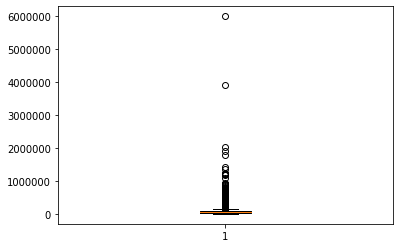

(38577, 37)

In [33]:
plt.boxplot(loan_df.annual_inc)
plt.show()
loan_df.shape

In [34]:
# Creating annual_inc  Bins 
loan_df['annual_inc_bucket'] = pd.qcut(loan_df.annual_inc, [0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
loan_df.head(10)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0        5000         5000         4,975.00    36     10.65       162.87   
1        2500         2500         2,500.00    60     15.27        59.83   
2        2400         2400         2,400.00    36     15.96        84.33   
3       10000        10000        10,000.00    36     13.49       339.31   
5        5000         5000         5,000.00    36      7.90       156.46   
6        7000         7000         7,000.00    60     15.96       170.08   
7        3000         3000         3,000.00    36     18.64       109.43   
8        5600         5600         5,600.00    60     21.28       152.39   
9        5375         5375         5,350.00    60     12.69       121.45   
10       6500         6500         6,500.00    60     14.65       153.45   

   grade sub_grade home_ownership  annual_inc verification_status issue_d  \
0      B        B2           RENT   24,000.00            Verified  Dec-11   
1      C        C4           RENT   30,000.00     Source Verified  Dec-11   
2      C        C5           RENT   12,252.00        Not Verified  Dec-11   
3      C        C1           RENT   49,200.00     Source Verified  Dec-11   
5      A        A4           RENT   36,000.00     Source Verified  Dec-11   
6      C        C5           RENT   47,004.00        Not Verified  Dec-11   
7      E        E1           RENT   48,000.00     Source Verified  Dec-11   
8      F        F2            OWN   40,000.00     Source Verified  Dec-11   
9      B        B5           RENT   15,000.00            Verified  Dec-11   
10     C        C3            OWN   72,000.00        Not Verified  Dec-11   

    loan_status             purpose                                  title  \
0    Fully Paid         credit_card                               Computer   
1   Charged Off                 car                                   bike   
2    Fully Paid      small_business                   real estate business   
3    Fully Paid               other                               personel   
5    Fully Paid             wedding  My wedding loan I promise to pay back   
6    Fully Paid  debt_consolidation                                   Loan   
7    Fully Paid                 car                        Car Downpayment   
8   Charged Off      small_business   Expand Business & Buy Debt Portfolio   
9   Charged Off               other            Building my credit history.   
10   Fully Paid  debt_consolidation             High intrest Consolidation   

   zip_code addr_state   dti earliest_cr_line  inq_last_6mths  open_acc  \
0     860xx         AZ 27.65           Jan-85               1         3   
1     309xx         GA  1.00           Apr-99               5         3   
2     606xx         IL  8.72           Nov-01               2         2   
3     917xx         CA 20.00           Feb-96               1        10   
5     852xx         AZ 11.20           Nov-04               3         9   
6     280xx         NC 23.51           Jul-05               1         7   
7     900xx         CA  5.35           Jan-07               2         4   
8     958xx         CA  5.55           Apr-04               2        11   
9     774xx         TX 18.08           Sep-04               0         2   
10    853xx         AZ 16.12           Jan-98               2        14   

    total_acc  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0           9     5,863.16         5,833.84         5,000.00         863.16   
1           4     1,008.71         1,008.71           456.46         435.17   
2          10     3,005.67         3,005.67         2,400.00         605.67   
3          37    12,231.89        12,231.89        10,000.00       2,214.92   
5          12     5,632.21         5,632.21         5,000.00         632.21   
6          11    10,110.84        10,110.84         6,985.61       3,125.23   
7           4     3,939.14         3,939.14         3,000.00         939.14   
8 

### Exploratory Data Analysis

In [35]:
#loan_term_by_status = loan_df.groupby(['term','loan_status'])['loan_status'].count()
#loan_term_by_status
#loan_term_by_status.unstack().plot(kind='bar', stacked=True, figsize=(10, 5))
#loan_term_by_status_info = loan_df.groupby(['term'])['loan_status_binary'].sum()
#loan_term_by_status_info
#func = lambda x: int(sum(x) / len(x) * 100)
#lambda x: int(sum(x) / len(x) * 100)
#d1_pivot = pd.pivot_table(data=loan_df,values="loan_status_binary",index="term", aggfunc=[func])
#print(d1_pivot)
#diff = d1_pivot.values.max() - d1_pivot.values.min()
#d1_pivot.plot(kind='bar', stacked=False, figsize=(10, 5))
#loan_term_by_status.unstack().plot(kind='bar', stacked=False, figsize=(10, 5))
#plt.show()
# plt.figure(figsize=(15,5))
# splot = sns.barplot(x='term', y='loan_status_binary',estimator=lambda x: int(sum(x) / len(x) * 100),data=loan_df,palette="RdYlBu")
# #plt.show()
# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points')
# plt.xlabel("Term in Months", size=14)
# plt.ylabel("Default Rate in %", size=14)
# d1_pivot = pd.pivot_table(data=loan_df,index="term",columns='loan_status', aggfunc=['count'])
# d1_pivot
# sns.countplot(x= loan_df["loan_status"])
# plt.show()

### Univariate Analysis

#### 1. Default Rate wrt Term

#### It clearly shows that Person who applied for high terms they are deaulter as well compare to Less Term applicant 

#### Creating a function which we can use multiple time for Categorical Dataset

In [36]:
def graph_bar(x_val):
    result = loan_df.groupby([x_val])['loan_status_binary'].aggregate(sum).reset_index().sort_values('loan_status_binary')
    splot = sns.barplot(x=x_val, y='loan_status_binary',estimator=lambda x: sum(x) / len(x) * 100,
                        data=loan_df,order=result[x_val],palette="RdYlBu")
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points')
    plt.ylabel("Default Rate in %", size=14)
    #print(result)

In [37]:
def graph_bar_without_perc(x_val):
    result_1 = loan_df.groupby([x_val])['loan_status_binary'].aggregate(sum).reset_index().sort_values('loan_status_binary')
    splot_1 = sns.barplot(x=x_val, y='loan_status_binary',
                        data=loan_df,order=result_1[x_val],estimator=sum,palette="RdYlBu")
    for p in splot_1.patches:
        splot_1.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points')
    plt.ylabel("Default Rate in %", size=14)
    #print(result_1)

#### 1. Default Rate wrt Term

#### It clearly shows that Person who applied for high terms they are deaulter as well compare to Less Term applicant 

Text(0.5, 0, 'Term in Months')

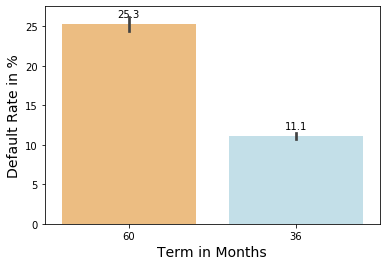

In [38]:
graph_bar('term')
plt.xlabel("Term in Months", size=14)

#### 2. Default Rate wrt Interest rate Grade

#### It clearly shows that Applicant which has high Grade they have  deaulter Rate also high as well compare to Grade A applicant 

result = loan_df.groupby(["grade"])['loan_status_binary'].aggregate(np.median).reset_index().sort_values('loan_status_binary')
sns.barplot(x='grade', y="loan_status_binary", estimator=lambda x: int(sum(x) / len(x) * 100),data=loan_df, order=result['grade']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

Text(0.5, 0, ' Interest Rate Grade')

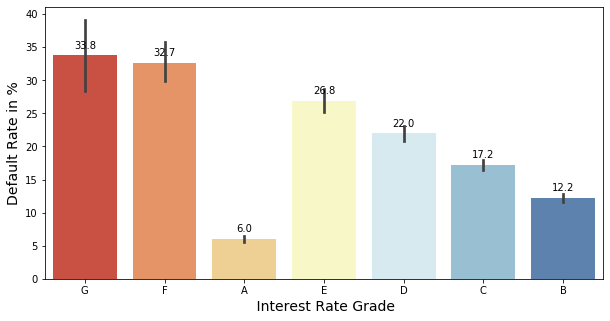

In [39]:
plt.figure(figsize=(10,5))
graph_bar('grade')
plt.xlabel(" Interest Rate Grade", size=14)


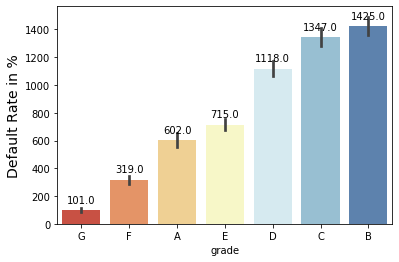

In [40]:
graph_bar_without_perc('grade')

In [41]:
loan_interest_grade_by_status = loan_df.groupby(['grade','loan_status'])['loan_status'].count()
loan_interest_grade_by_status

grade  loan_status
A      Charged Off      602
       Fully Paid      9443
B      Charged Off     1425
       Fully Paid     10250
C      Charged Off     1347
       Fully Paid      6487
D      Charged Off     1118
       Fully Paid      3967
E      Charged Off      715
       Fully Paid      1948
F      Charged Off      319
       Fully Paid       657
G      Charged Off      101
       Fully Paid       198
Name: loan_status, dtype: int64

#### 3. Default Rate wrt Purpose of Loan

#### It clearly shows that Person who applied for Small Businesses  they are deaulter compare to other Purpose 

Text(0.5, 0, 'Purpose of Loan')

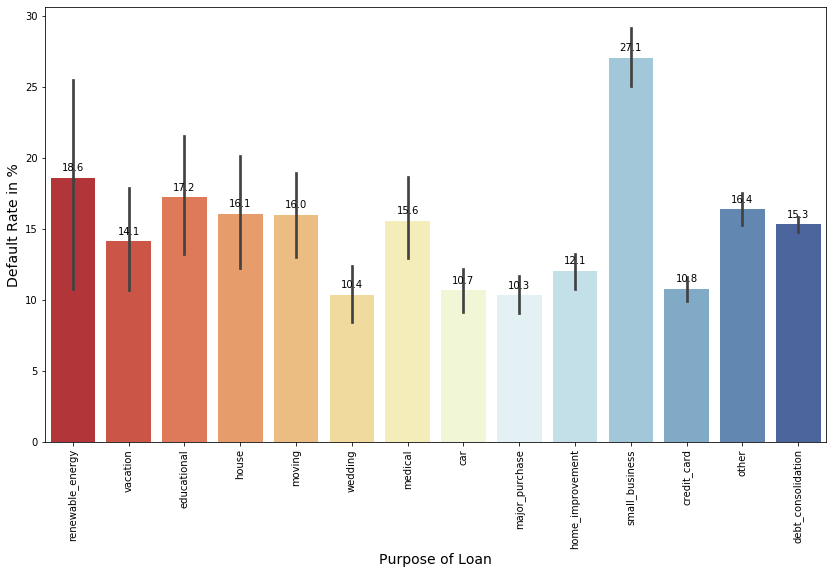

In [42]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
graph_bar('purpose')
plt.xlabel("Purpose of Loan", size=14)


<Figure size 1008x576 with 0 Axes>

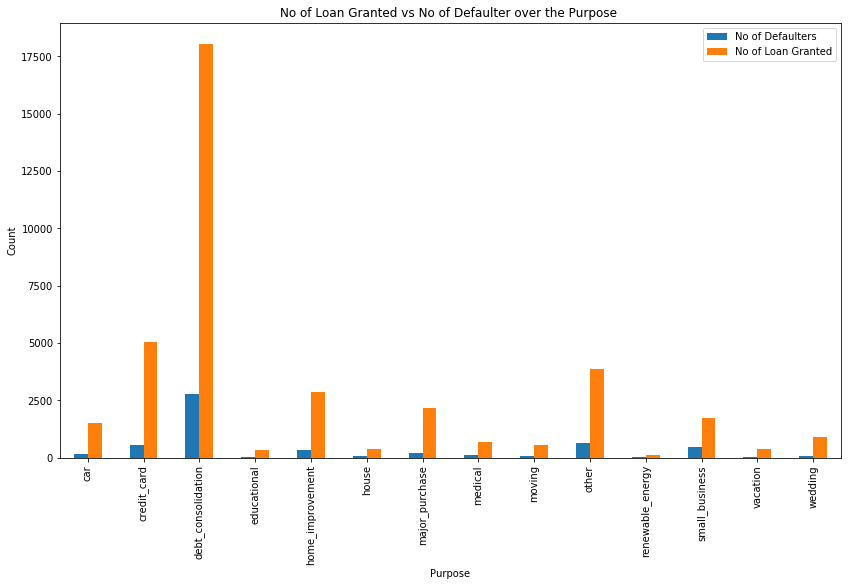

In [43]:
plt.figure(figsize=(14,8))
default_loan_by_purpose = pd.pivot_table(data=loan_df,index='purpose',values='loan_status_binary',aggfunc=[sum,'count'])
default_loan_by_purpose.plot.bar(figsize=(14, 8))
plt.title('No of Loan Granted vs No of Defaulter over the Purpose ')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.legend(['No of Defaulters','No of Loan Granted'])
plt.show()

#### 4. Default Rate wrt issue_d_year

#### It clearly shows that Person who applied for high terms they are deaulter as well compare to Less Term applicant 

Text(0.5, 0, ' Loan Year')

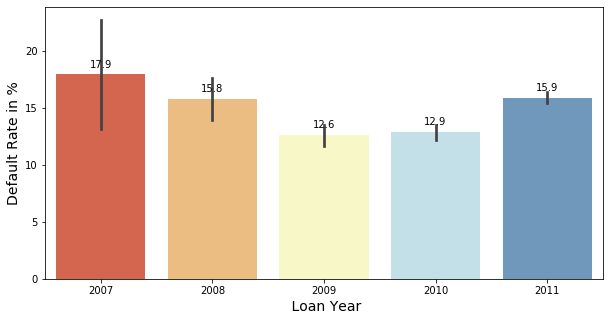

In [44]:
plt.figure(figsize=(10,5))
graph_bar('issue_d_year')
plt.xlabel(" Loan Year", size=14)

#### 5. Default Rate wrt issue_d_month

#### It clearly shows that Person who applied for high terms they are deaulter as well compare to Less Term applicant 

Text(0.5, 0, ' Loan Month')

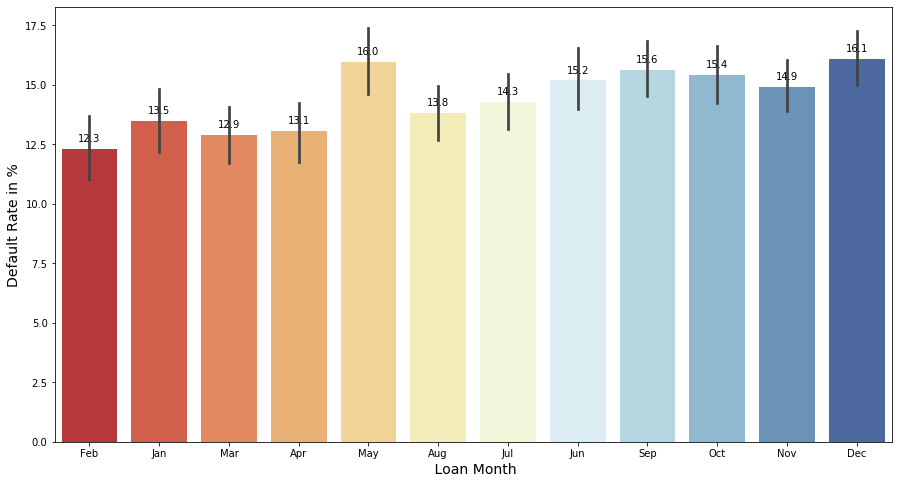

In [45]:
plt.figure(figsize=(15,8))
graph_bar('issue_d_month')
plt.xlabel(" Loan Month", size=14)

#### 6. Default Rate wrt emp_length_years

#### It clearly shows that Person who applied for high terms they are deaulter as well compare to Less Term applicant 

Text(0.5, 0, ' Employeement in Years')

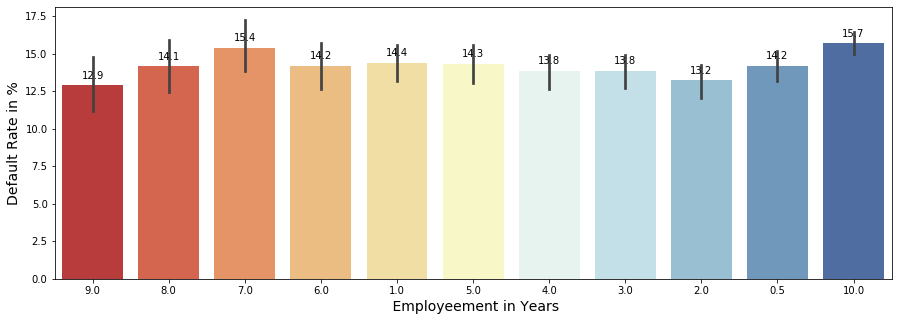

In [46]:
plt.figure(figsize=(15,5))
graph_bar('emp_length_years')
plt.xlabel(" Employeement in Years", size=14)

In [47]:
loan_emp_length_years_by_status = loan_df.groupby(['emp_length_years','loan_status'])['loan_status'].count()
loan_emp_length_years_by_status

emp_length_years  loan_status
0.50              Charged Off     639
                  Fully Paid     3869
1.00              Charged Off     456
                  Fully Paid     2713
2.00              Charged Off     567
                  Fully Paid     3724
3.00              Charged Off     555
                  Fully Paid     3457
4.00              Charged Off     462
                  Fully Paid     2880
5.00              Charged Off     458
                  Fully Paid     2736
6.00              Charged Off     307
                  Fully Paid     1861
7.00              Charged Off     263
                  Fully Paid     1448
8.00              Charged Off     203
                  Fully Paid     1232
9.00              Charged Off     158
                  Fully Paid     1068
10.00             Charged Off    1331
                  Fully Paid     7157
Name: loan_status, dtype: int64

#### 7. Default Rate wrt Sub Grade

#### It clearly shows that Person who applied for high terms they are deaulter as well compare to Less Term applicant 

Text(0.5, 0, ' Interest Rate Sub Grade')

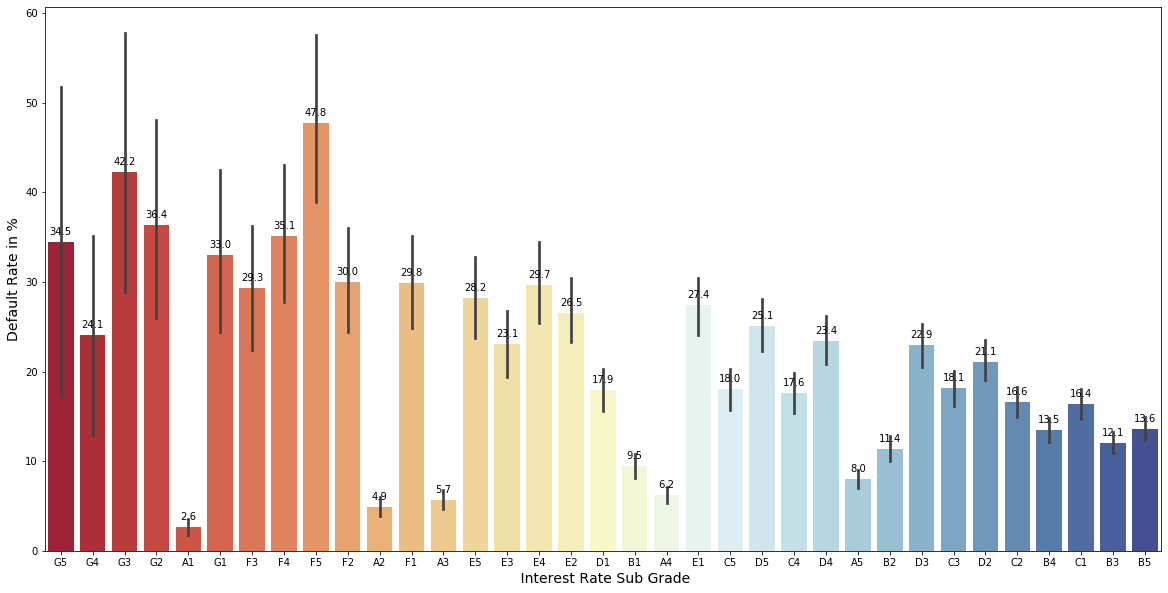

In [48]:
plt.figure(figsize=(20,10))
graph_bar('sub_grade')
plt.xlabel(" Interest Rate Sub Grade", size=14)

Text(0, 0.5, 'Number of Defaulters')

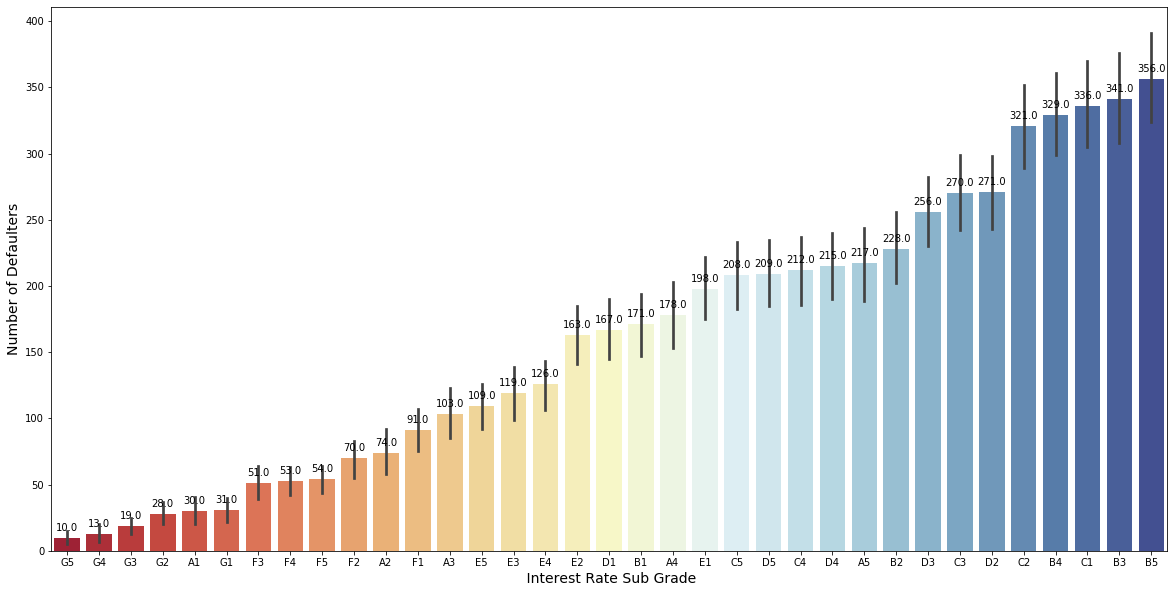

In [49]:
plt.figure(figsize=(20,10))
graph_bar_without_perc('sub_grade')
plt.xlabel(" Interest Rate Sub Grade", size=14)
plt.ylabel("Number of Defaulters", size=14)

In [50]:
loan_sub_grade_by_status = loan_df.groupby(['sub_grade','loan_status'])['loan_status'].count()
#loan_sub_grade_by_status

#### 8. Default Rate wrt home_ownership

#### Applicant having there home rented or on mortgage have almost equal tendancy to default the loan

Text(0.5, 0, ' Home Owernership')

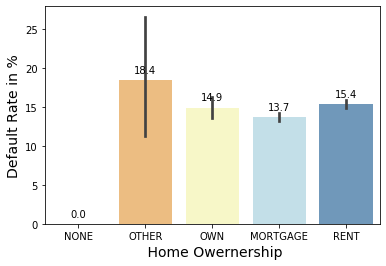

In [51]:
graph_bar('home_ownership')
plt.xlabel(" Home Owernership", size=14)

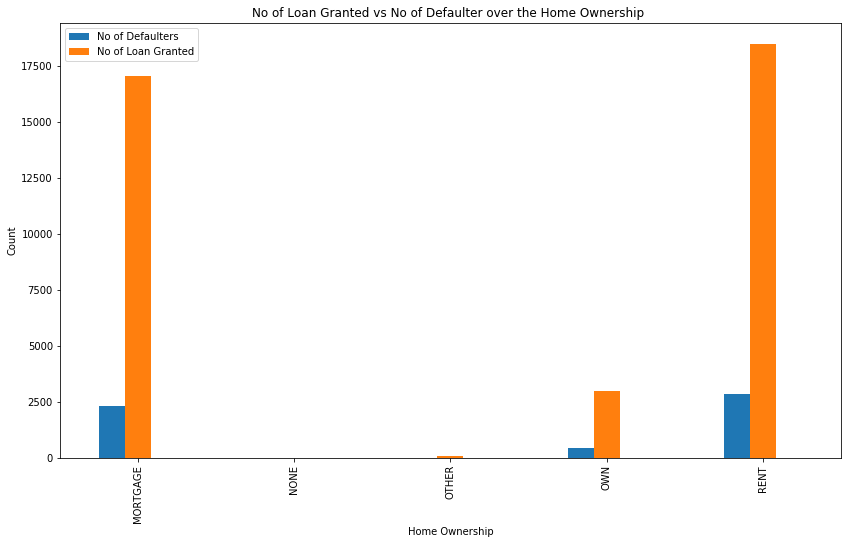

In [53]:
func = lambda x: int(sum(x) / len(x) * 100)
default_loan_by_home_owenership = pd.pivot_table(data=loan_df,index='home_ownership',values='loan_status_binary',aggfunc=[sum,'count',func])
default_loan_by_home_owenership.plot.bar(figsize=(14, 8))
plt.title('No of Loan Granted vs No of Defaulter over the Home Ownership ')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(['No of Defaulters','No of Loan Granted'])
plt.show()

#### 9. Default Rate wrt Int_Rate_Bucket

#### It clearly shows that Person who applied for high Interest Rate  they are more pron to get deaulter as well compare to Less Interest Rate applicant 

Text(0.5, 0, ' Interest Rate')

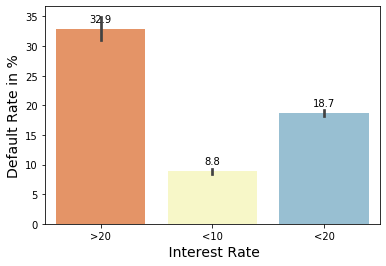

In [54]:
graph_bar('Int_Rate_Bucket')
plt.xlabel(" Interest Rate", size=14)

#### 9. Default Rate wrt Loan_Amount_Bucket

#### It clearly shows that Person who applied for high Loan Amount they are deaulter than  Less Loan Amount applicant 

Text(0.5, 0, ' Loan Amount')

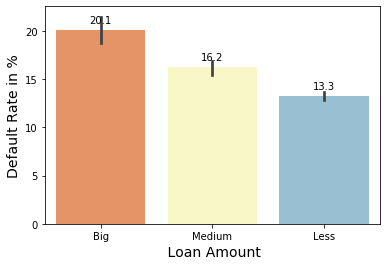

In [55]:
graph_bar('Loan_Amount_Bucket')
plt.xlabel(" Loan Amount", size=14)

#### 10. Default Rate wrt Debt To Income

#### It clearly shows that The Person who has high DTI  they are pron to deaulter than  Less Loan Amount applicant 

In [56]:
loan_dti_by_status = loan_df.groupby(['dti_bucket','loan_status'])['loan_status'].count()
loan_dti_by_status

dti_bucket  loan_status
VL          Charged Off     625
            Fully Paid     4419
L           Charged Off    1001
            Fully Paid     6860
M           Charged Off    1399
            Fully Paid     8225
H           Charged Off    1394
            Fully Paid     7430
VH          Charged Off    1121
            Fully Paid     5478
VVH         Charged Off      87
            Fully Paid      538
Name: loan_status, dtype: int64

Text(0.5, 0, ' Debt To Income')

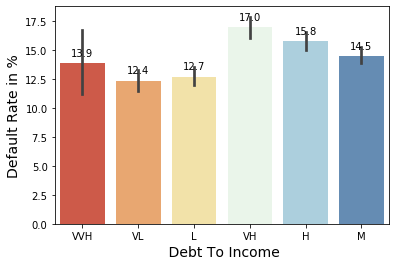

In [57]:
graph_bar('dti_bucket')
plt.xlabel(" Debt To Income", size=14)

#### 11. Default Rate wrt State

#### This is interesting to know that the person from California states are more defaulter than any other state.

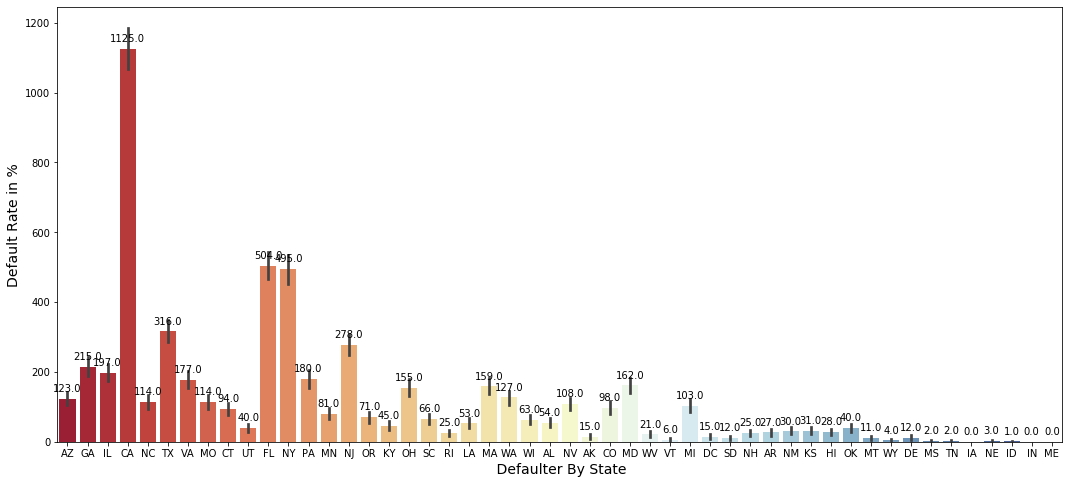

In [58]:
#result_state = loan_df.groupby['addr_state'].aggregate(sum).reset_index().sort_values('loan_status_binary')
plt.figure(figsize=(18,8))
splot = sns.barplot(x='addr_state', y='loan_status_binary',estimator=sum,
                    data=loan_df,palette="RdYlBu")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')
plt.ylabel("Default Rate in %", size=14)
plt.xlabel(" Defaulter By State", size=14)
plt.show()

#### 12. Default Rate wrt Verification Status

#### Interesting Loan that get varified are more defaulter in %

Text(0.5, 0, ' Verification Status')

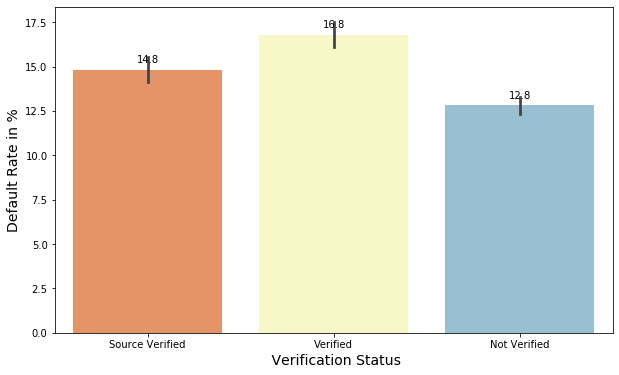

In [59]:
plt.figure(figsize=(10,6))
graph_bar('verification_status')
plt.xlabel(" Verification Status", size=14)

#### 13. Default Rate wrt Employee Income Bucket

#### Applicant who has less salary are more prone to be defaulters -- Values are in %

Text(0.5, 0, ' Employee Income')

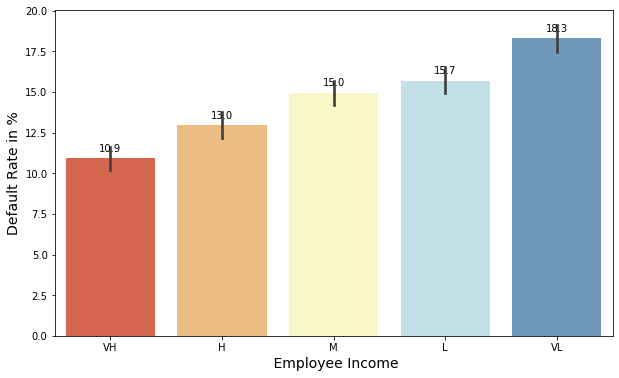

In [60]:
plt.figure(figsize=(10,6))
graph_bar('annual_inc_bucket')
plt.xlabel(" Employee Income", size=14)

### Bivariate Analysis

In [61]:
def graph_bar_biv(x_val,hue):
    result = loan_df.groupby([x_val])['loan_status_binary'].aggregate(sum).reset_index().sort_values('loan_status_binary')
    splot = sns.barplot(x=x_val, y='loan_status_binary',hue=hue,estimator=lambda x: sum(x) / len(x) * 100,
                        data=loan_df,order=result[x_val],palette="RdYlBu")
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points')
    plt.ylabel("Default Rate in %", size=14)
    #print(result)

#### Analysis 1 Term Vs Annual Income Vs Default Rate

##### Those having more income are more Defaulter rate

Text(0.5, 0, ' Loan term with Annual Inc')

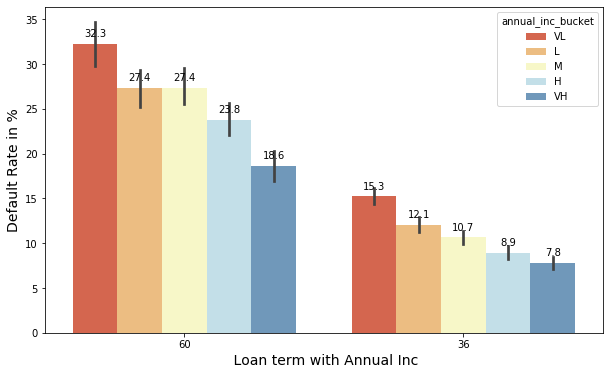

In [62]:
plt.figure(figsize=(10,6))
graph_bar_biv('term','annual_inc_bucket')
plt.xlabel(" Loan term with Annual Inc", size=14)

#### Analysis 2 Term Vs Grades Vs Default Rate

##### 60 term is higher we already checked earlier and in that F grade is highest for Defaulter rate

Text(0.5, 0, ' Loan Term with Grade')

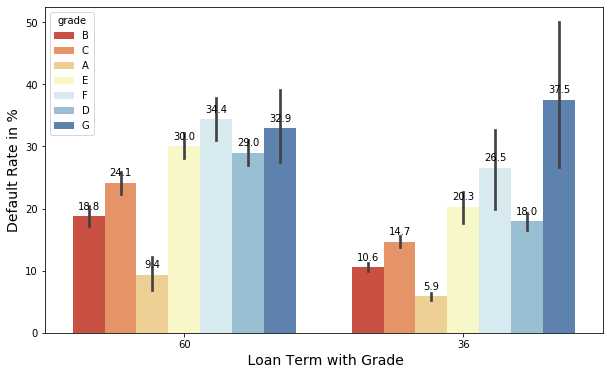

In [63]:
plt.figure(figsize=(10,6))
graph_bar_biv('term','grade')
plt.xlabel(" Loan Term with Grade", size=14)

#### Analysis 2 Term Vs DTI Vs Default Rate

##### 60 term loan applicant with higher DTI  are more prone to be Defaulter. The highest is for Bucket VH 20+ for Defaulter rate

Text(0.5, 0, ' Loan Term with dti_bucket')

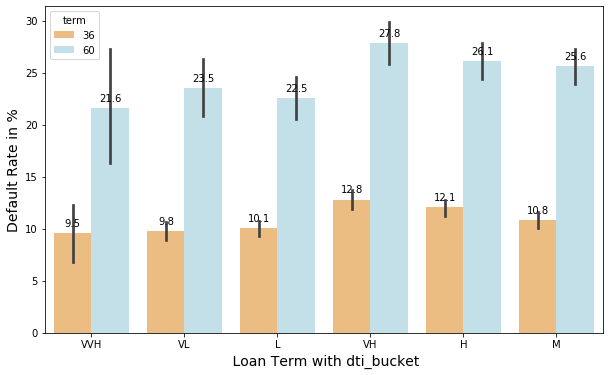

In [64]:
plt.figure(figsize=(10,6))
graph_bar_biv('dti_bucket','term')
plt.xlabel(" Loan Term with dti_bucket", size=14)

#### Analysis 3 Term Vs Loan_Amount_Bucket Vs Default Rate

##### 60 term with high Loan_Amount_Bucket is more prone to  Defaulter 

Text(0.5, 0, ' Loan Term with Loan_Amount_Bucket')

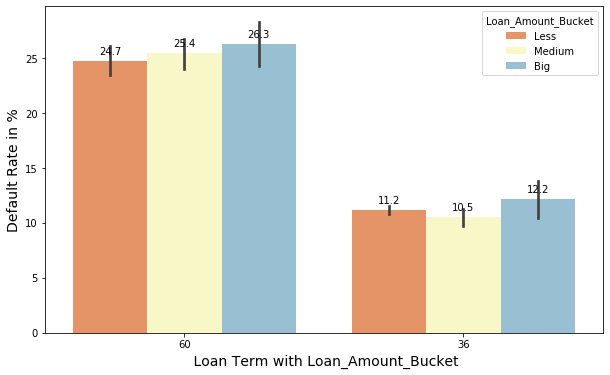

In [65]:
plt.figure(figsize=(10,6))
graph_bar_biv('term','Loan_Amount_Bucket')
plt.xlabel(" Loan Term with Loan_Amount_Bucket", size=14)

#### Analysis 4 Term Vs Interest Rate Vs Default Rate

##### 60 term with high Interest Rate is more prone to  Defaulter ..... in 36 Terms as well same

Text(0.5, 0, ' Loan Term wrt Interest Rate')

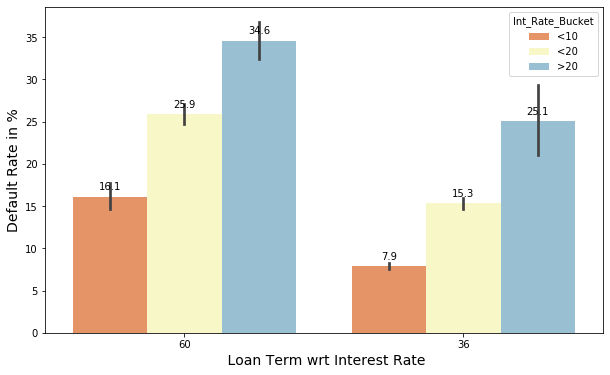

In [66]:
plt.figure(figsize=(10,6))
graph_bar_biv('term','Int_Rate_Bucket')
plt.xlabel(" Loan Term wrt Interest Rate", size=14)

#### Analysis 5 Loan_Amount_Bucket Vs Interest Rate Vs Default Rate

##### Loan amount with High Interest Rate applicants are more Prone to be Defaulter

Text(0.5, 0, ' Loan_Amount_Bucket with Int_Rate_Bucket')

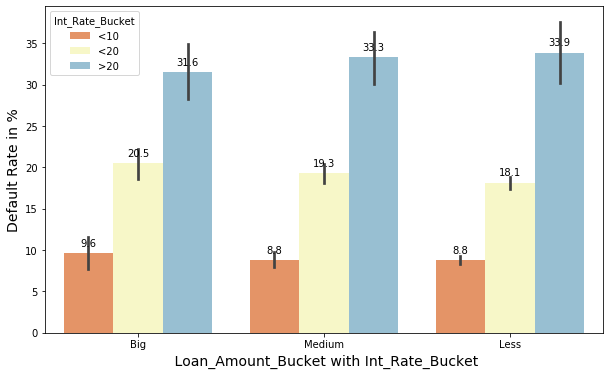

In [67]:
plt.figure(figsize=(10,6))
graph_bar_biv('Loan_Amount_Bucket','Int_Rate_Bucket')
plt.xlabel(" Loan_Amount_Bucket with Int_Rate_Bucket", size=14)

#### Analysis 6 DTI Vs Interest Rate Vs Default Rate

##### HighDTI with High Interest Rate applicants are more Prone to be Defaulter

Text(0.5, 0, ' DTI with Int_Rate_Bucket')

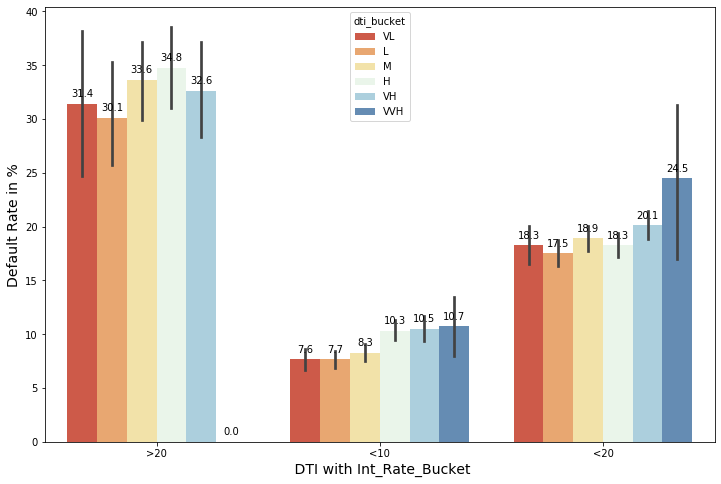

In [68]:
plt.figure(figsize=(12,8))
graph_bar_biv('Int_Rate_Bucket','dti_bucket')
plt.xlabel(" DTI with Int_Rate_Bucket", size=14)

#### Analysis 7 Loan_Amount_Bucket Vs DTI Vs Default Rate

##### Loan amount with High DTI  applicants are more Prone to be Defaulter

Text(0.5, 0, ' Loan_Amount_Bucket with DTI')

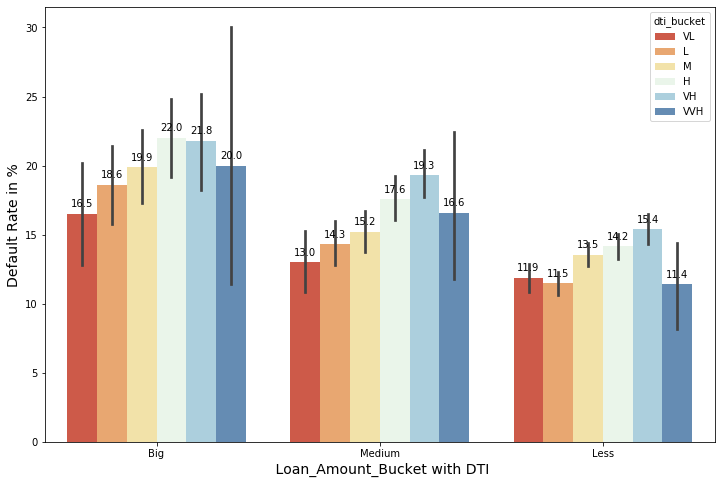

In [69]:
plt.figure(figsize=(12,8))
graph_bar_biv('Loan_Amount_Bucket','dti_bucket')
plt.xlabel(" Loan_Amount_Bucket with DTI", size=14)

#### Analysis 8  Purpose Vs InterestRate,Loan_Amount_Bucket, Term  Vs Default Rate

##### Loan application for Small business are more prone to defalter if they have High Rate, High Amount

In [70]:
# top 5 purpose dataset

loan_df.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [71]:
top5_purpose = pd.pivot_table(data=loan_df,index="purpose", values="loan_status_binary", aggfunc=sum)
top5_purpose = top5_purpose.sort_values(by='loan_status_binary', ascending=False)
top5_purpose = top5_purpose.iloc[:5,:].round(1)
top5_purpose_df = loan_df[loan_df.purpose.isin(['debt_consolidation','other','credit_card',
                                                'small_business','home_improvement'])]

In [72]:
def graph_bar_biv_purpose(x_val,hue):
    result = loan_df.groupby([x_val])['loan_status_binary'].aggregate(sum).reset_index().sort_values('loan_status_binary')
    splot = sns.barplot(x=x_val, y='loan_status_binary',hue=hue,estimator=lambda x: sum(x) / len(x) * 100,
                        data=top5_purpose_df,order=result[x_val],palette="RdYlBu")
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points')
    plt.ylabel("Default Rate in %", size=14)
    #print(result)

Text(0.5, 0, ' Term with Purpose')

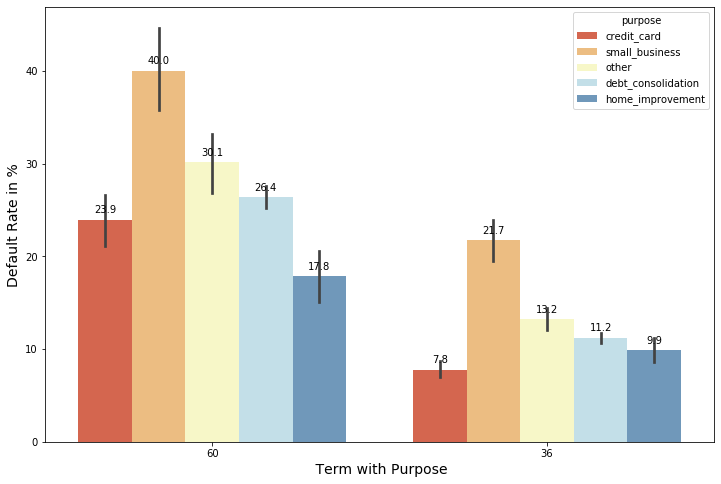

In [73]:
plt.figure(figsize=(12,8))
graph_bar_biv_purpose('term','purpose')
plt.xlabel(" Term with Purpose", size=14)

Text(0.5, 0, ' Loan_Amount_Bucket with Purpose')

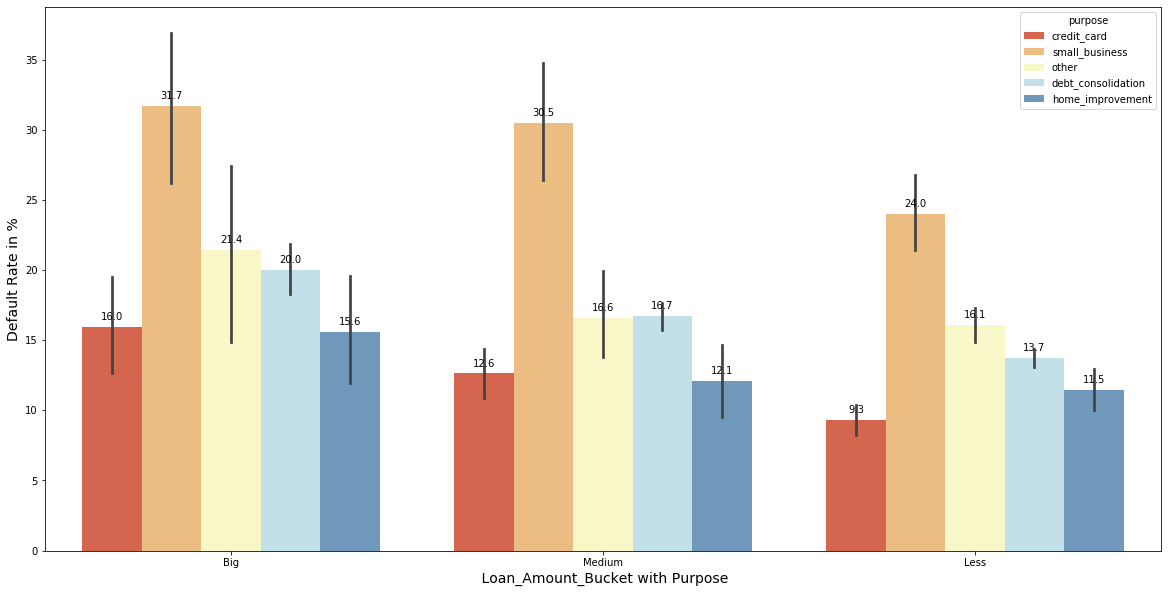

In [74]:
plt.figure(figsize=(20,10))
graph_bar_biv_purpose('Loan_Amount_Bucket','purpose')
plt.xlabel(" Loan_Amount_Bucket with Purpose", size=14)

Text(0.5, 0, ' Employeement Length with Int_Rate_Bucket')

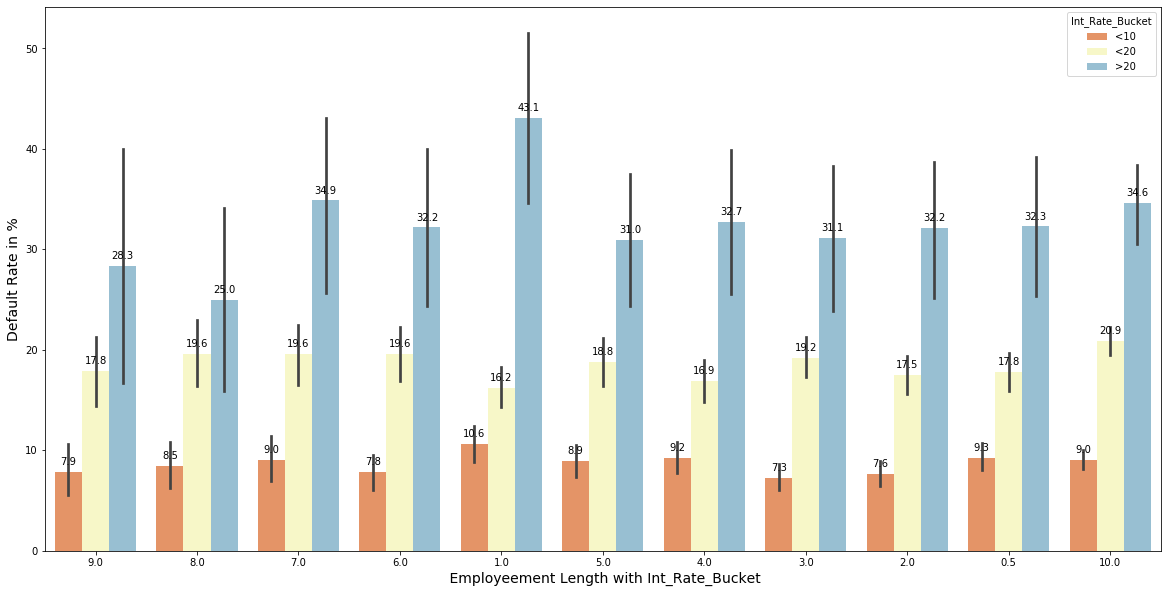

In [75]:
plt.figure(figsize=(20,10))
graph_bar_biv_purpose('emp_length_years','Int_Rate_Bucket')
plt.xlabel(" Employeement Length with Int_Rate_Bucket", size=14)

Text(0.5, 0, ' Grade with Purpose')

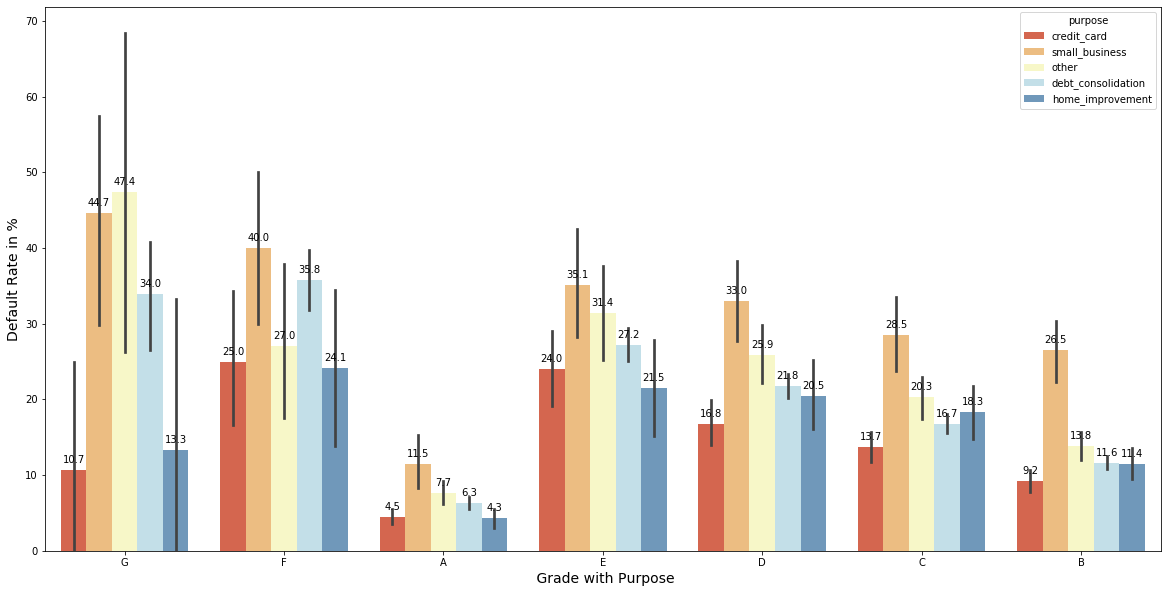

In [76]:
plt.figure(figsize=(20,10))
graph_bar_biv_purpose('grade','purpose')
plt.xlabel(" Grade with Purpose", size=14)

Text(0.5, 0, ' Int_Rate_Bucket with Purpose')

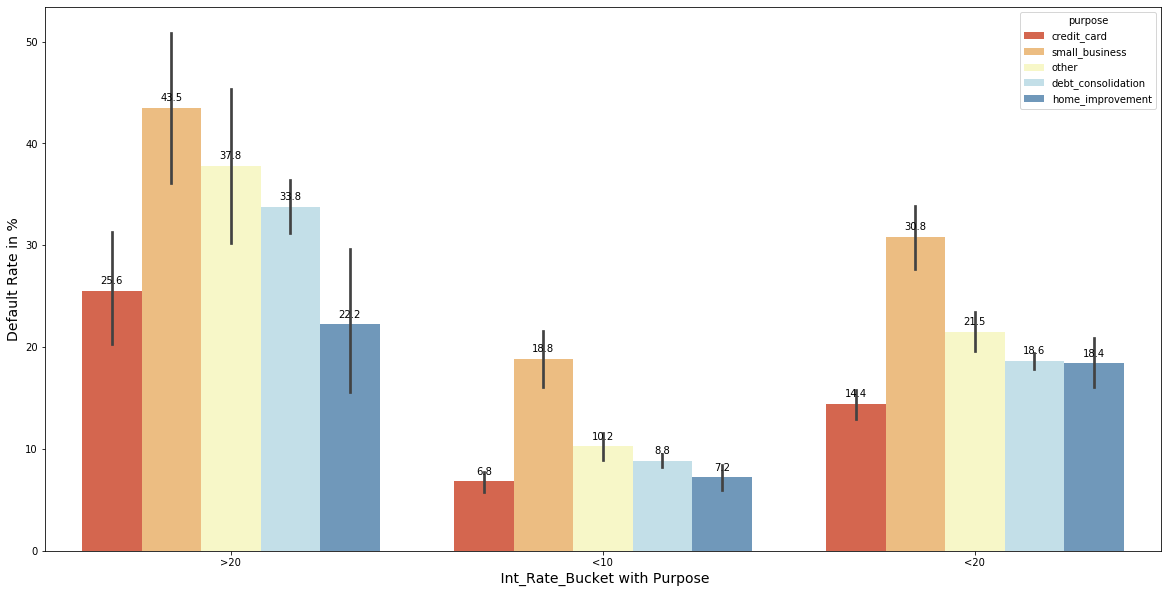

In [77]:
plt.figure(figsize=(20,10))
graph_bar_biv_purpose('Int_Rate_Bucket','purpose')
plt.xlabel(" Int_Rate_Bucket with Purpose", size=14)

Text(0.5, 0, ' DTI with Int_Rate_Bucket')

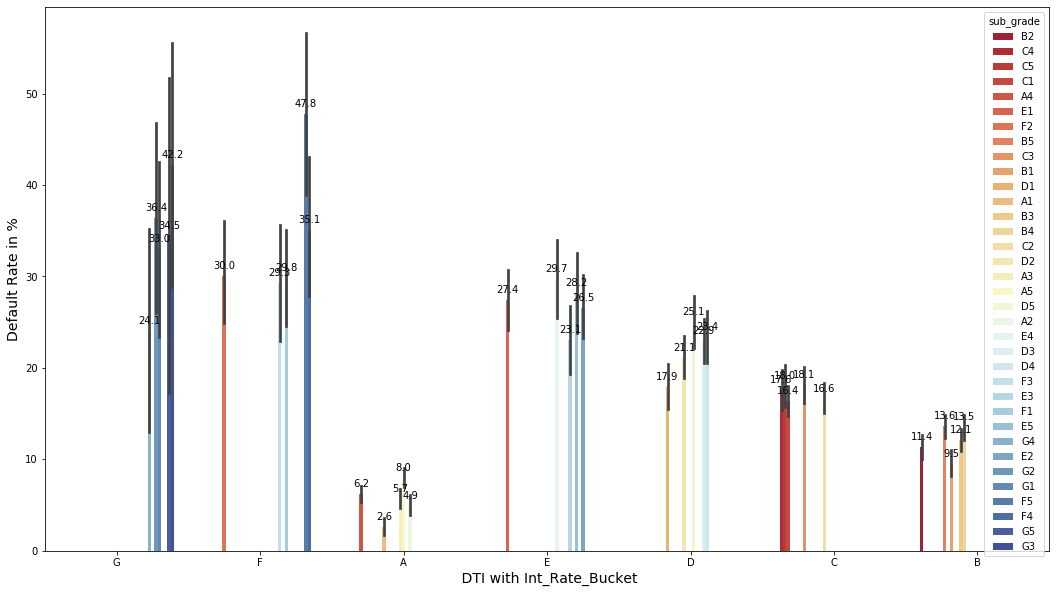

In [78]:
plt.figure(figsize=(18,10))
graph_bar_biv('grade','sub_grade')
plt.xlabel(" DTI with Int_Rate_Bucket", size=14)

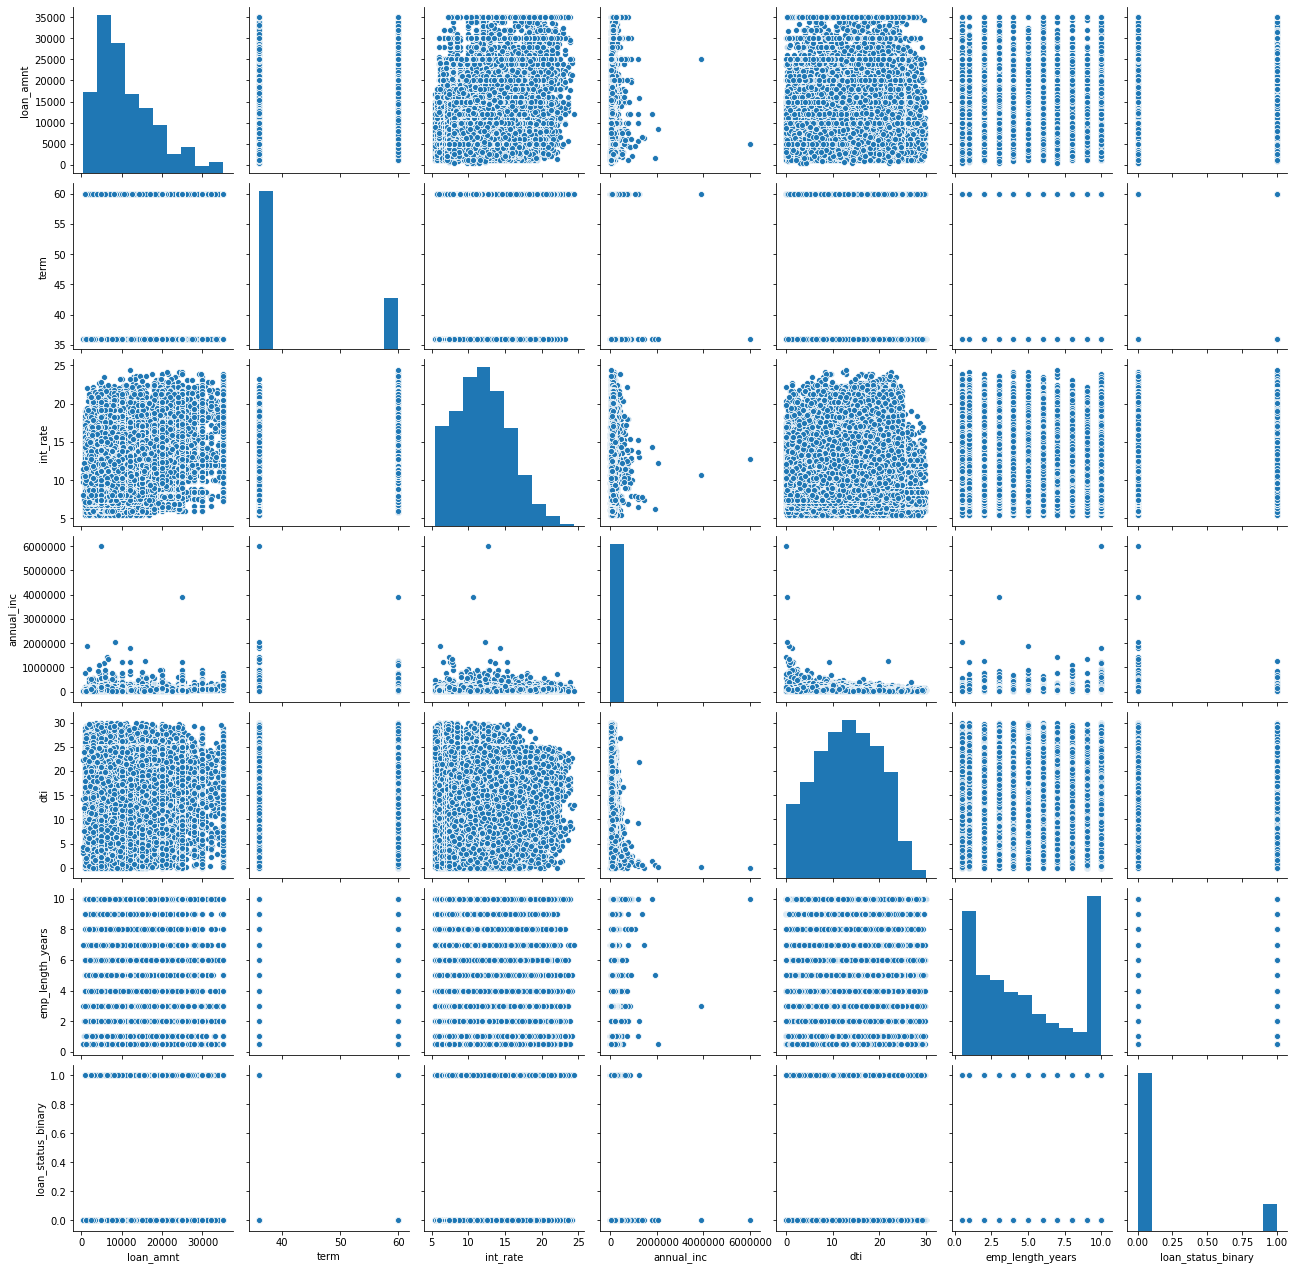

In [79]:
sns.pairplot(loan_df[['loan_amnt','term','int_rate','annual_inc','dti','emp_length_years',"loan_status_binary"]])
plt.show()

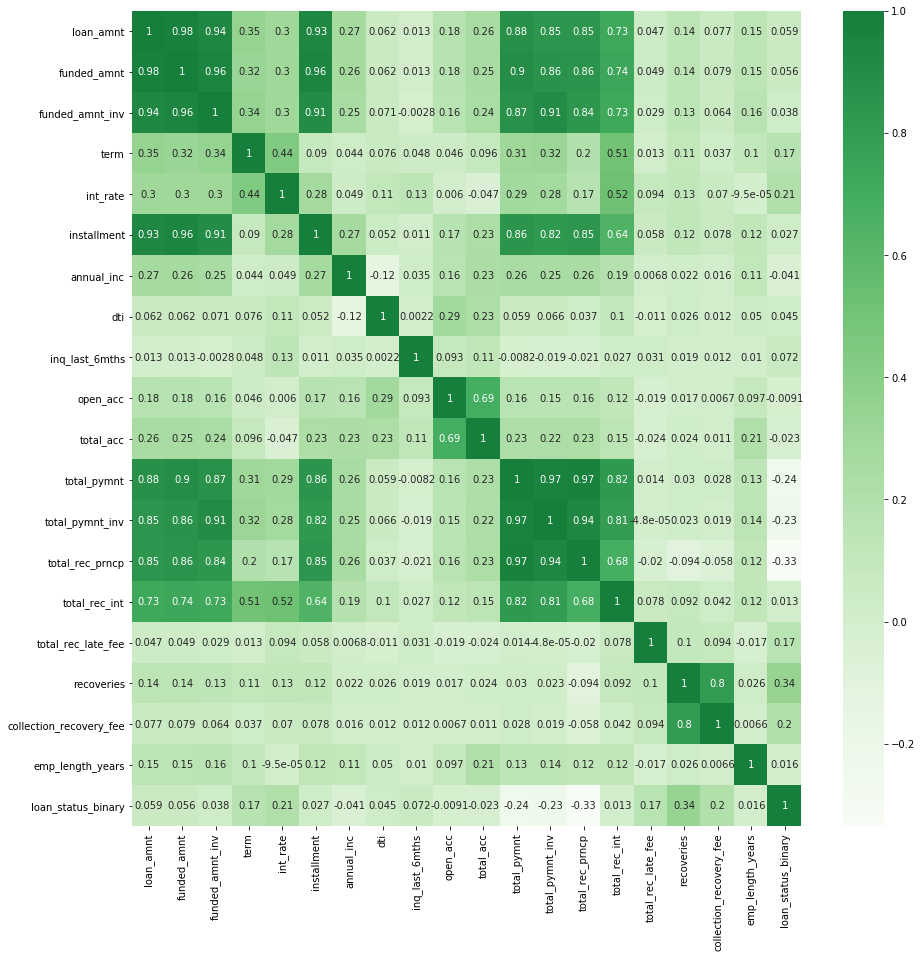

In [80]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'term','int_rate', 'installment','grade','sub_grade','addr_state',
       'dti', 'purpose','emp_length_years','loan_status_binary','annual_inc']
corr = loan_df.corr()
sns.heatmap(corr, annot=True, center=0.5,cmap="Greens")

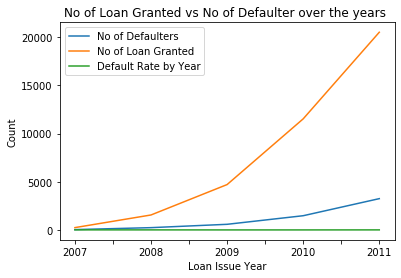

In [81]:
default_loan_by_year = pd.pivot_table(data=loan_df,index='issue_d_year',values='loan_status_binary',aggfunc=[sum,'count',func])
default_loan_by_year.plot.line()
plt.title('No of Loan Granted vs No of Defaulter over the years ')
plt.xlabel('Loan Issue Year')
plt.ylabel('Count')
plt.legend(['No of Defaulters','No of Loan Granted','Default Rate by Year'])
plt.show()

### Calculate Information Content to find top 10 Pridictors

In [82]:
info_content_pred = {}
func = lambda x: int(sum(x) / len(x) * 100)
#lambda x: int(sum(x) / len(x) * 100)
def get_information(x_val):
    d1_pivot = pd.pivot_table(data=loan_df,values="loan_status_binary",index=x_val, aggfunc=[func])
    diff = d1_pivot.values.max() - d1_pivot.values.min()
    #print(d1_pivot)
    #print(diff)
    #print(x_val)
    info_content_pred[x_val] = diff
    #return diff
    #d1_pivot.plot(kind='bar', stacked=False, figsize=(10, 5))

In [83]:
info_content_pred_aray = [get_information('grade'),get_information('term'),get_information('Loan_Amount_Bucket'),
                          get_information('dti_bucket'),get_information('Int_Rate_Bucket'),get_information('emp_length_years')
                          #,get_information('sub_grade')
                          ,get_information('annual_inc_bucket'),get_information('purpose')
                          ,get_information('issue_d_year'),get_information('issue_d_month'),
                          get_information('home_ownership')
                          #,get_information('addr_state')
                         ]

info_content_pred


{'grade': 28,
 'term': 14,
 'Loan_Amount_Bucket': 7,
 'dti_bucket': 4,
 'Int_Rate_Bucket': 24,
 'emp_length_years': 3,
 'annual_inc_bucket': 8,
 'purpose': 17,
 'issue_d_year': 5,
 'issue_d_month': 4,
 'home_ownership': 18}

In [84]:
## Sorting by values 

## Converting diconary into Dataframe


info_content_pred_df = pd.DataFrame.from_dict([info_content_pred])
info_content_pred_df_T = info_content_pred_df.T
info_content_pred_df_T.sort_values(by=0,ascending = False)
#info_content_pred_df_T.sort_index(axis=0,ascending = False)

0
grade               28
Int_Rate_Bucket     24
home_ownership      18
purpose             17
term                14
annual_inc_bucket    8
Loan_Amount_Bucket   7
issue_d_year         5
dti_bucket           4
issue_d_month        4
emp_length_years     3

<Figure size 864x576 with 0 Axes>

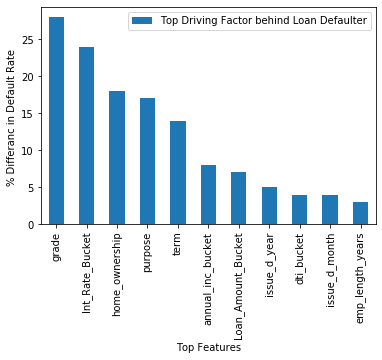

In [85]:
plt.figure(figsize=(12,8))
info_content_pred_df_T.sort_values(by=0,ascending = False).plot(kind='bar')
plt.xlabel("Top Features")
plt.ylabel("% Differanc in Default Rate ")
plt.legend(['Top Driving Factor behind Loan Defaulter'])
plt.show()


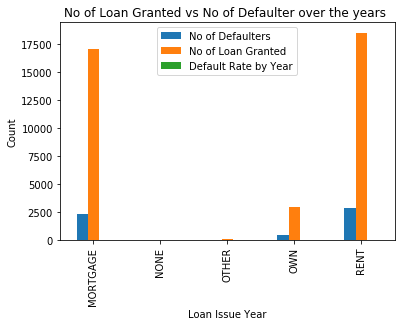

In [86]:
default_loan_by_home_owenership = pd.pivot_table(data=loan_df,index='home_ownership',values='loan_status_binary',aggfunc=[sum,'count',func])
default_loan_by_home_owenership.plot.bar()
plt.title('No of Loan Granted vs No of Defaulter over the years ')
plt.xlabel('Loan Issue Year')
plt.ylabel('Count')
plt.legend(['No of Defaulters','No of Loan Granted','Default Rate by Year'])
plt.show()

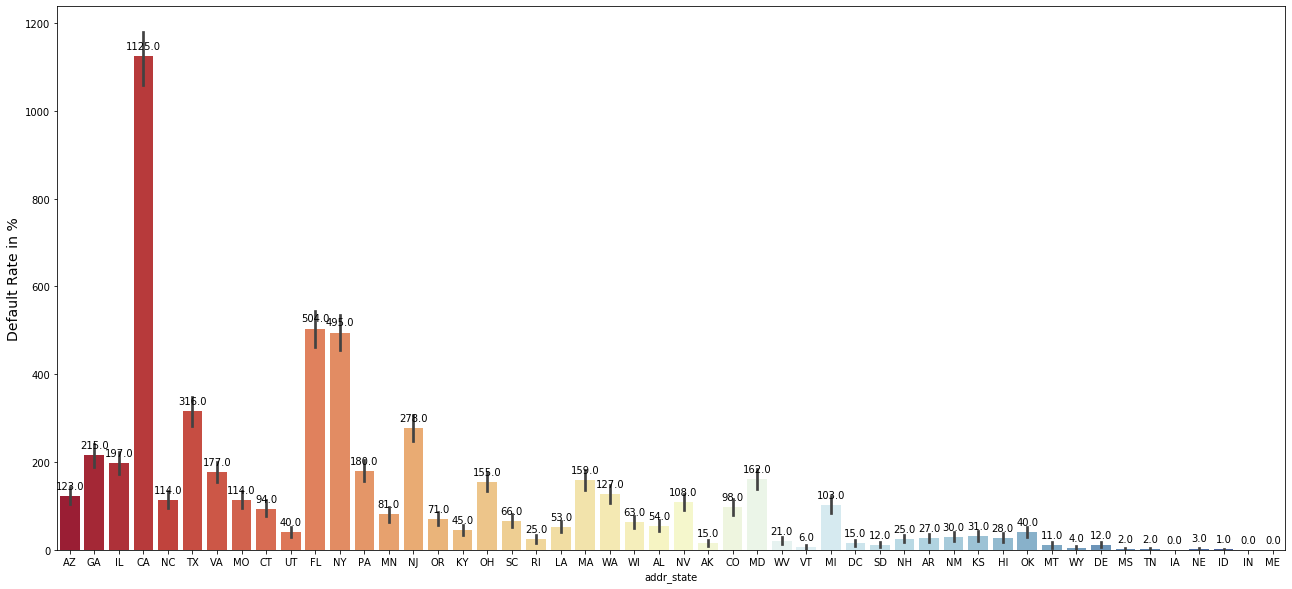

In [87]:
plt.figure(figsize=(22,10))
splot = sns.barplot(x='addr_state', y='loan_status_binary',estimator=sum,
                    data=loan_df,palette="RdYlBu")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')
    plt.ylabel("Default Rate in %", size=14)
plt.show()

In [88]:
#result = loan_df.groupby(['emp_length_years'])['loan_status_binary'].aggregate(sum).reset_index().sort_values('loan_status_binary')
#result['percentage'] = 
#result

In [92]:
loan_df.loan_amnt.max()

35000

In [ ]:
loan_term_by_emp_length = loan_df.groupby(['emp_length_years','loan_status'])['loan_status'].count()
loan_term_by_emp_length

In [ ]:
#?pd.qcut
#?pd.cut

In [ ]:
loan_df['Int_Rate_Bucket'] = pd.cut(loan_df.int_rate, bins=3,  
       labels=['low', 'medium', 'high'])
loan_df.int_rate.value_counts()

In [ ]:
loan_df.head()

In [ ]:
loan_df